# Customer Segmentation using K-Means Algorithm 

## Understanding the Data
* Importing useful & required libraries
* We will be brieefly understanding our dataset
* Check for the Null values.
* Preparing data for clustering.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv("Mall_Customers.csv")
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
72,73,Female,60,50,49
113,114,Male,19,64,46
126,127,Male,43,71,35
199,200,Male,30,137,83
97,98,Female,27,60,50


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
X= df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Performing Elbow Method to find optimal number of clusters
* Using K means to itrate from 1 to 11 clusters and plotting a Elbow plot.
* Deciding optimal number of clusters to be used.


In [25]:
from sklearn.cluster import KMeans

In [16]:
wcss = []

In [17]:
for i in range (1,11):
    kmeans=KMeans(n_clusters = i,init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

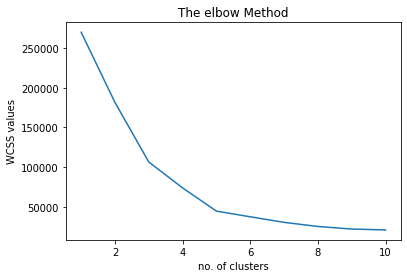

In [20]:
plt.plot(range(1,11),wcss)
plt.title('The elbow Method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS values')
plt.show()

## We find the optimal no. of clusters = 5

In [33]:
Kmeansmodel = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = Kmeansmodel.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

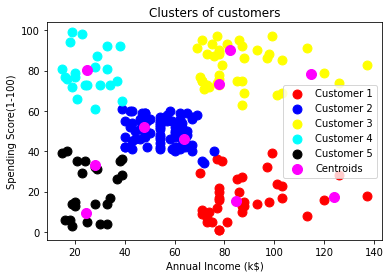

In [32]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s= 80, c = "red" , label='Customer 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s= 80, c = "blue" , label='Customer 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s= 80, c = "yellow" , label='Customer 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s= 80, c = "cyan" , label='Customer 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], s= 80, c = "black" , label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s= 100, c = "magenta" , label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

## Conclusions from the Scatterplot
* customers in  Cyan Cluster are the customers having less Annual Income and more spending. 
* customers in  Red Cluster are the customers having less Annual Income and more spending.
* customers in  blue Cluster are the customers having decent Annual Income and decent spending. 

*Hence we can say company should target the blue cluster and promote their products to blue cluster customer.* 
